The goal in this project is to understand the price trends and the elements that have an impact on avocado sales in United States. If we assume all avocados here are being sold by one supplier (or a group of suppliers), a specific objective can be to see what composition of packaging can increase revenue for avocado producers. This project also includes a number of linear regressions to predict the average price of avocado.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
avocado = pd.read_csv('C:/Users/472848/Documents/Data Scienc Projects/avocado.csv')

In [3]:
avocado.head(5)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Cleaning the data

In [4]:
del avocado['Unnamed: 0']
avocado['Date'] =pd.to_datetime(avocado['Date'])

In [5]:
avocado.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
avocado_date = avocado.groupby('Date').mean()

In [8]:
avocado.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
avocado_date.head(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Date,,,,,,,,,,
2015-01-04,1.301296,7.840216e+05,306465.358704,341213.318796,21100.172593,115242.790648,91759.341667,23015.332407,468.116574,2015
2015-01-11,1.370648,7.273686e+05,287260.786944,303781.757778,21751.550463,114574.490370,95860.522407,18313.259259,400.708704,2015
2015-01-18,1.391111,7.258221e+05,294469.507963,293167.054907,20446.764352,117738.747593,97674.575093,19866.538241,197.634259,2015
2015-01-25,1.397130,7.080211e+05,299121.600648,267862.244167,19244.248704,121793.027500,100715.897685,20859.406667,217.723148,2015
2015-02-01,1.247037,1.106048e+06,465675.823704,469409.541481,34143.419537,136819.689815,107192.904167,28462.864722,1163.920926,2015


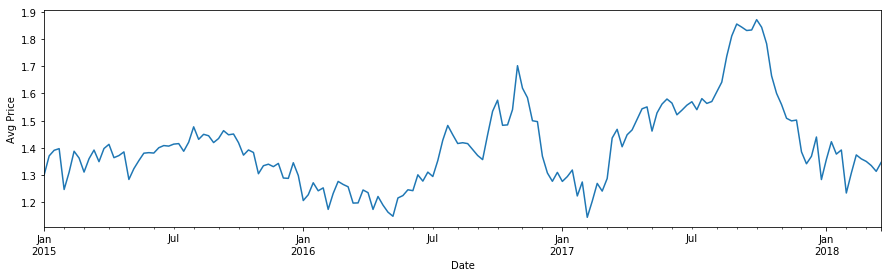

In [10]:
avocado_date.AveragePrice.plot(figsize=(15,4))
plt.ylabel('Avg Price')
plt.show()

There is a seasonal trend and a general upward trajectory visible here.

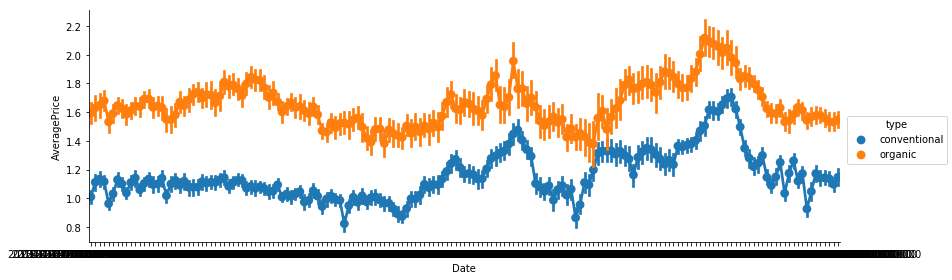

In [11]:
ax=sns.factorplot(x='Date', y='AveragePrice', data=avocado, hue='type', aspect=3)
plt.show()

In [12]:
avocado_date_t =avocado.pivot_table(index='Date', columns='type',aggfunc='mean')['AveragePrice']

In [13]:
avocado_date_t.head(10)

type,conventional,organic
Date,,
2015-01-04,1.009630,1.592963
2015-01-11,1.111296,1.630000
2015-01-18,1.133519,1.648704
2015-01-25,1.115370,1.678889
2015-02-01,0.962037,1.532037
2015-02-08,1.030370,1.590556
2015-02-15,1.129074,1.646111
2015-02-22,1.099815,1.625556
2015-03-01,1.036852,1.585185


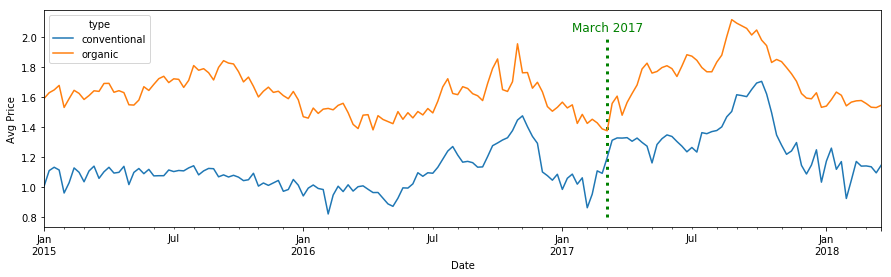

In [14]:
avocado_date_t.plot(figsize=(15,4))
plt.text(x='2017-1-15', y= 2.04, s='March 2017', color='green', fontsize =12)
plt.vlines(x='2017-3-1', ymin= 0.8, ymax= 2, color='green', linestyles=':', linewidth=3, label='March 2017')
plt.ylabel('Avg Price')
plt.show()

In March 2017 the average price for conventional and organic avocado was almost the same (not sure why, an interesting observation).

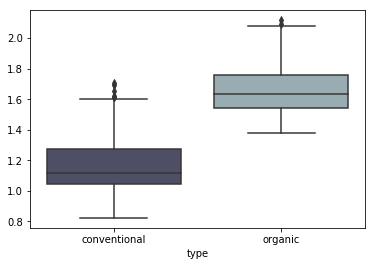

In [15]:
sns.boxplot(data=avocado_date_t,palette='bone')
plt.show();

The price of organic avocado is on average 45% higher than conventional avocado.


In [16]:
x=[]
for i in range(len(avocado)):
    m=avocado['Date'].loc[i].strftime("%B")
    x.append(m)


In [17]:
avocado['month'] = x

In [18]:
avocado_year = avocado.pivot_table(index='month', columns='year', aggfunc='mean')['AveragePrice']

In [19]:
avocado_year.head(5)

year,2015,2016,2017,2018
month,,,,
April,1.383449,1.205023,1.502611,NaN
August,1.444481,1.411111,1.698958,NaN
December,1.305244,1.315995,1.363852,NaN
February,1.326944,1.237106,1.214792,1.318704
January,1.365046,1.240185,1.277500,1.387431


In [20]:
month_order={
    'January':1,
    'February':2,
    'March':3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

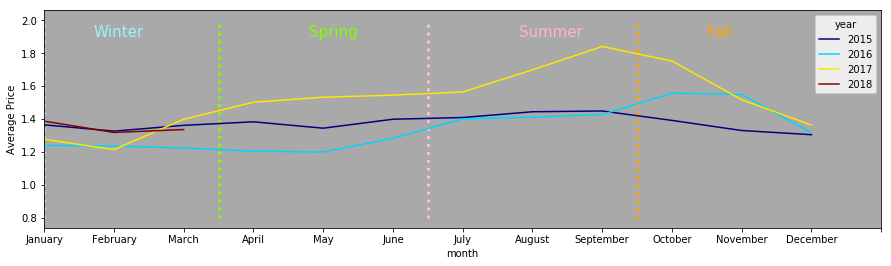

In [21]:
fig=avocado_year.loc[month_order].plot(figsize=(15,4), xticks=range(0,13), cmap='jet')
fig.set_facecolor('#A9A9A9')
plt.text(x=0.7, y= 1.9, s='Winter', color='#98F5FF', fontsize =15)
plt.vlines(x=0, ymin= 0.8, ymax= 2, color='lightblue', linestyles=':', linewidth=3)
plt.text(x=3.8, y=1.9, s='Spring', color='#7FFF00', fontsize=15)
plt.vlines(x=2.5, ymin=0.8, ymax=2, color='#7FFF00', linestyles=':', linewidth=3)
plt.text(x=6.8, y=1.9, s='Summer', color='#FFB6C1', fontsize=15)
plt.vlines(x=5.5, ymin=0.8, ymax=2, color='pink', linestyles=':', linewidth=3)
plt.text(x=9.5, y=1.9, s='Fall', color='orange', fontsize=15)
plt.vlines(x=8.5, ymin=0.8, ymax=2, color='orange', linestyles=':', linewidth=3)
plt.ylabel('Average Price')
plt.show()

Now we need to find the price fluctuations in each year

In [22]:
year_15=avocado.loc[avocado['year']==2015]
year_16=avocado.loc[avocado['year']==2016]
year_17=avocado.loc[avocado['year']==2017]
year_18=avocado.loc[avocado['year']==2018]

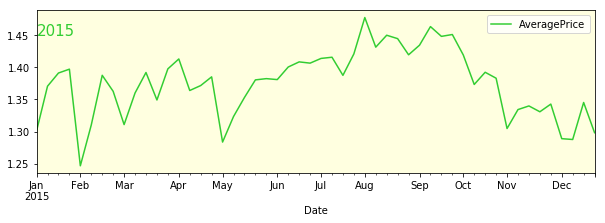

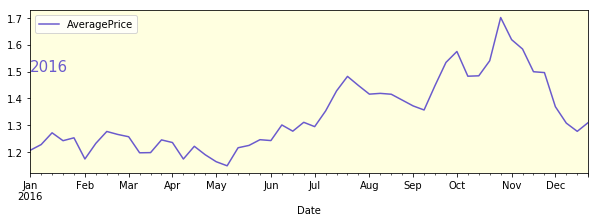

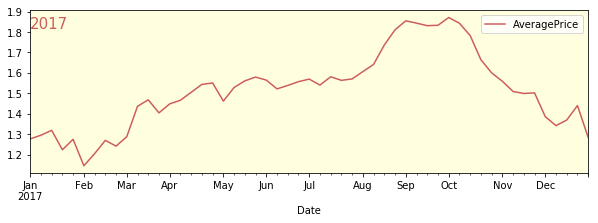

In [23]:
fig1=year_15.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='limegreen')
plt.text(x='2015-1-1', y=1.45, s='2015', color='limegreen', fontsize=15)
fig1.set_facecolor('lightyellow')

fig2=year_16.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='slateblue')
plt.text(x='2016-1-1', y=1.50, s='2016', color='slateblue', fontsize=15)
fig2.set_facecolor('lightyellow')

fig3=year_17.groupby('Date').mean().plot(y='AveragePrice', figsize=(10,3), kind='line', sharex=True, color='indianred')
plt.text(x='2017-1-1', y=1.82, s='2017', color='indianred', fontsize=15)
fig3.set_facecolor('lightyellow')

plt.show()

Now we intend to find the avg price by months across the years listed, also the volume by months across years

In [24]:
#changing the date format in dataset into year and month separately.
y=[]
a=avocado_date.index
for i in range(len(avocado_date)):
    m=a[i].strftime("%B")
    y.append(m)
avocado_date['month']=y

In [25]:
avocado_volume=avocado.pivot_table(index='Date', aggfunc='sum')
b=avocado_volume.index
z=[]
for i in range(len(avocado_volume)):
    m=b[i].strftime("%B")
    z.append(m)

ab=[]
for i in range(len(avocado_volume)):
    m=b[i].strftime("%Y")
    ab.append(m)

avocado_volume['month']=z
avocado_volume['year']=ab



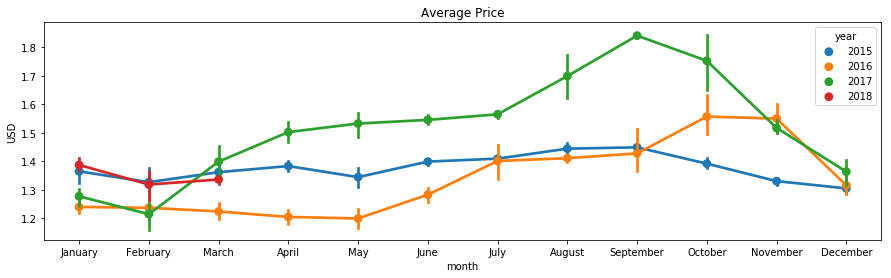

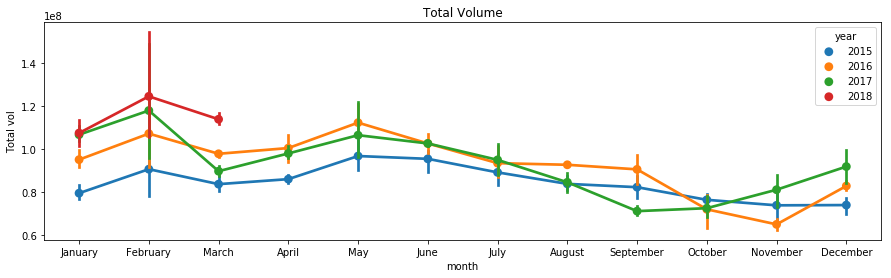

In [26]:
plt.figure(figsize=(15,4))
sns.pointplot(x='month', y='AveragePrice', data=avocado_date, hue='year', pallete='Set1')
plt.title('Average Price')
plt.ylabel('USD')

plt.figure(figsize=(15,4))
sns.pointplot(x='month', y='Total Volume', data=avocado_volume, hue='year', pallete='Set1')
plt.title('Total Volume')
plt.ylabel('Total vol')
plt.show()

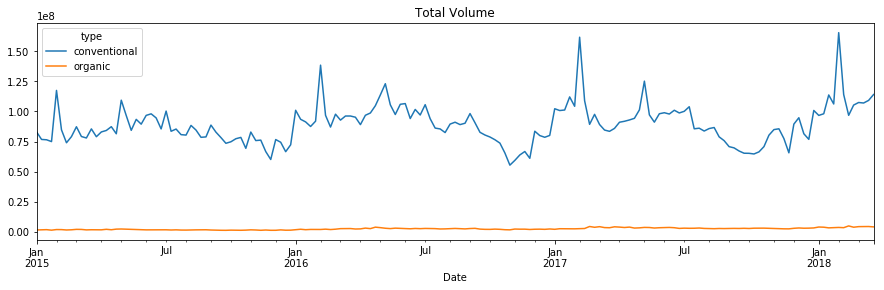

In [27]:
#The market share based on type:

avocado_type_volume=avocado.pivot_table(index='Date', columns='type', aggfunc='sum')
avocado_type_volume.plot(y='Total Volume', figsize=(15,4),title ='Total Volume')
plt.show()


In [28]:
#now we find market share for organic and conventional avocados

vol_total=avocado_type_volume['Total Volume'].sum(axis=1)
vol_conv=avocado_type_volume['Total Volume']['conventional']/vol_total*100
vol_org=100-vol_conv

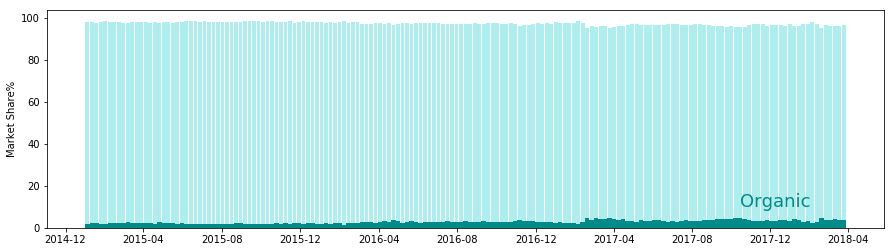

In [29]:
plt.figure(figsize=(15,4))
plt.text(x='2017-10-15', y=10, s='Organic',color='darkcyan', fontsize=18)
plt.bar(x=a, height=vol_conv, width=6, color='paleturquoise')
plt.bar(x=a, height=vol_org, width=7, color='darkcyan')
plt.ylabel('Market Share%')
plt.show()

Is the price of avocado different in different regions of US? Can we explain the price distribution?



In [30]:
avocado.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson',
       'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro',
       'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego',
       'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral',
       'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS',
       'West', 'WestTexNewMexico'], dtype=object)

In [31]:
west=avocado.loc[avocado['region']=='West']
southeast=avocado.loc[avocado['region']=='Southeast']
northeast=avocado.loc[avocado['region']=='Northeast']
plains=avocado.loc[avocado['region']=='Plains']
southcentral=avocado.loc[avocado['region']=='SouthCentral']
totalus=avocado.loc[avocado['region']=='TotalUS']
midsouth=avocado.loc[avocado['region']=='Midsouth']



In [32]:
df=pd.merge(west, southeast, on='Date', suffixes=('_west', '_southeast'))
df=pd.concat([west, southeast])


In [33]:
df1=pd.concat([df,southcentral])
df2=pd.concat([df1,plains])
df3=pd.concat([df2,northeast])
df4=pd.concat([df3,midsouth])
df5=pd.concat([df4,totalus])
df5_price=df5.pivot_table(index='Date', columns='region', aggfunc='mean')['AveragePrice']

Moving Average of the price

In [34]:
ma_days=[10,20,50]
for ma in ma_days:
    column_name='MA for {} days'.format(ma)
    df5_price[column_name]=df5_price['TotalUS'].rolling(ma).mean()  


In [35]:
test=df5_price.groupby('Date')[['TotalUS', 'MA for 10 days','MA for 20 days','MA for 50 days']].mean()

In [36]:
test.drop('TotalUS', axis=1, inplace=True)
test.column_name='Moving Average'


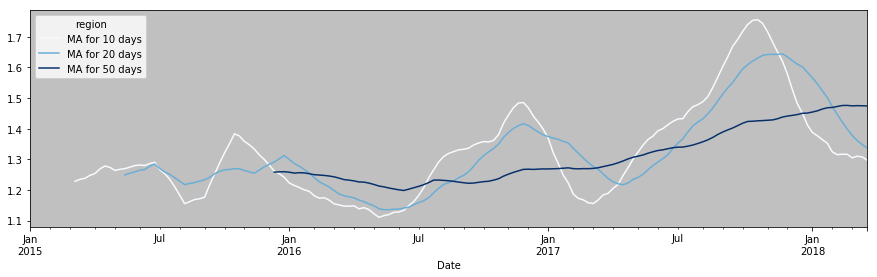

In [37]:
fig2=test.plot(figsize=(15,4), kind='line', cmap ='Blues')
fig2.set_facecolor('silver')
plt.show()

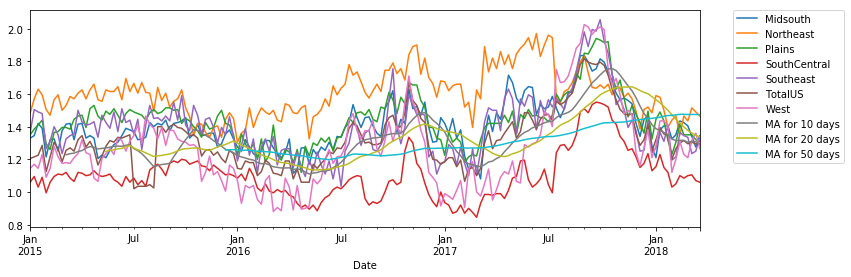

In [38]:
df5_price.plot(kind='line', figsize=(12,4))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()


In [39]:
r=df5_price.index
c=[]
for i in range(len(df5_price)):
    m=r[i].strftime("%B")
    c.append(m)
df5_price['month']=c

f=[]
for i in range(len(df5_price)):
    m=r[i].strftime("%Y")
    f.append(m)
df5_price['year']=f




In [40]:
med=df5_price.median()

In [41]:
med.sort_values()

region
SouthCentral         1.090000
West                 1.240000
MA for 50 days       1.269400
MA for 20 days       1.277375
MA for 10 days       1.294250
TotalUS              1.300000
Midsouth             1.380000
Southeast            1.380000
Plains               1.430000
Northeast            1.595000
year              2016.000000
dtype: float64

In [42]:
median=['SouthCentral', 'West', 'Midsouth', 'Southeast', 'Plains', 'Northeast']

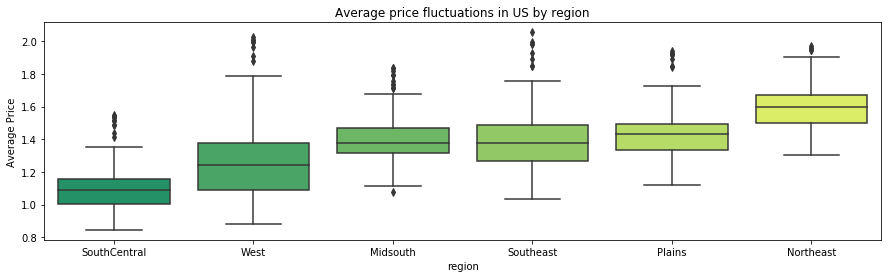

In [43]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df5_price[['West','Midsouth','Northeast', 'Plains', 'SouthCentral', 'Southeast']], palette='summer', saturation=1, order=median)
plt.ylabel('Average Price')
plt.title('Average price fluctuations in US by region')
plt.show()

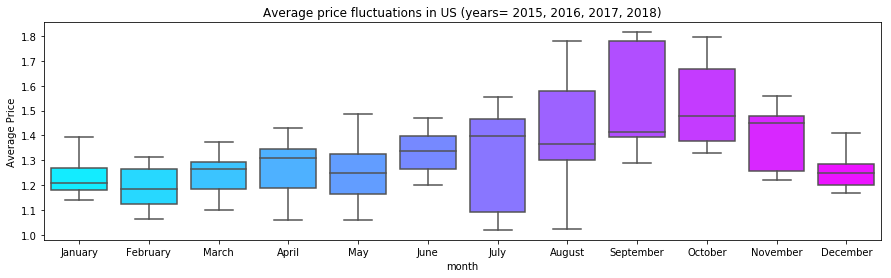

In [44]:
#let us check if we can see the fluctuations in price in particular month across the years
plt.figure(figsize=(15,4))
sns.boxplot(x='month', y='TotalUS', data=df5_price, palette='cool', saturation=1)
plt.ylabel('Average Price')
plt.title('Average price fluctuations in US (years= 2015, 2016, 2017, 2018)')
plt.show()

Insights and observations till now:
  1. The average price changes drastically with region and time of the year.
  2. Also for regions, farther we are from South border, avg. price increases. This attributes to majority of Hass avocados being imported to US from Peru, Chile and Mexico. Therein comes into play the additional transportation cost.
  3. The average price in total US seems to be higher in colder months too. Considering the fact that most of the avocado is coming from south America and that the seasons are switched comapred to north America, this could be related to the amount of avocados that's available during colder months in south.

Now, let's see what the consumption looks like in different seasons and regions:


In [45]:
df5_volume=df5.pivot_table(index='Date', columns='region', aggfunc='sum')['Total Volume']

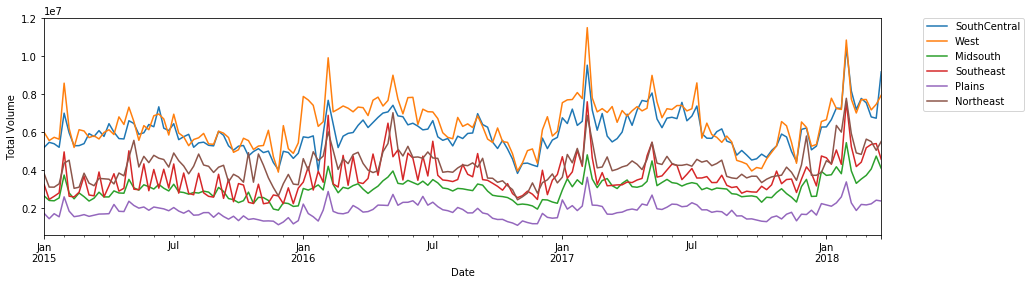

In [46]:
df5_volume[median].plot(kind='line', figsize=(15,4))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.ylabel('Total Volume')
plt.show()

In [47]:
medi=df5_volume.median()
medi.sort_values()

region
Plains           1815593.98
Midsouth         3002976.47
Southeast        3468123.45
Northeast        4206538.64
SouthCentral     5919244.12
West             6343111.65
TotalUS         33831963.20
dtype: float64

In [48]:
order=['Plains','Midsouth','Southeast','Northeast','SouthCentral','West']

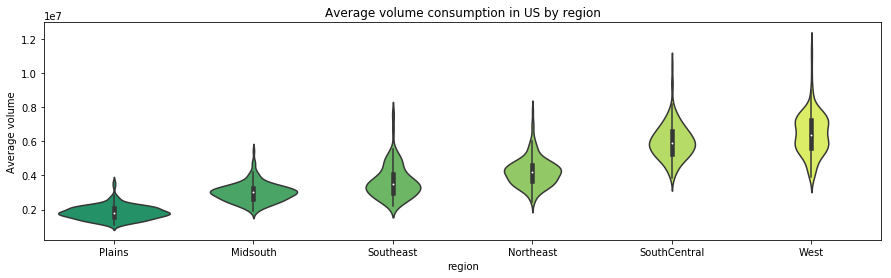

In [49]:
#average volume consumption by region
plt.figure(figsize=(15,4))
sns.violinplot(data=df5_volume[order], palette='summer', saturation=1, order=order)
plt.ylabel('Average volume')
plt.title('Average volume consumption in US by region')
plt.show()

In [50]:
p=df5_volume.index
v=[]
for i in range(len(df5_volume)):
    m=p[i].strftime("%B")
    v.append(m)
df5_volume['month']=v

w=[]
for i in range(len(df5_price)):
    m=p[i].strftime("%Y")
    w.append(m)
df5_price['year']=w


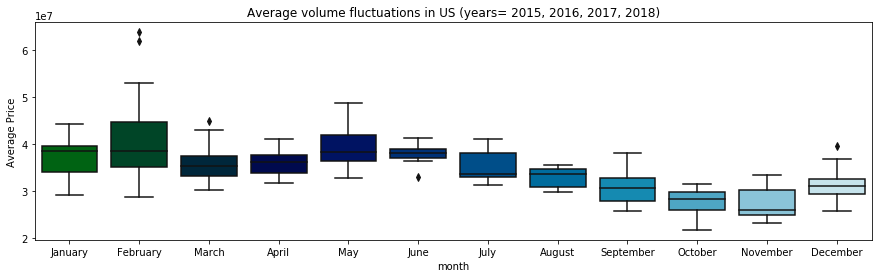

In [51]:
#let us check if we can see the fluctuations in volume in particular month across the years
plt.figure(figsize=(15,4))
sns.boxplot(x='month', y='TotalUS', data=df5_volume, palette='ocean', saturation=1)
plt.ylabel('Average Price')
plt.title('Average volume fluctuations in US (years= 2015, 2016, 2017, 2018)')
plt.show()

In [52]:
avocado['Total indiv']=avocado['Total Volume'] - avocado['Total Bags']
avocado['Revenue indiv']=avocado['Total indiv']*avocado['AveragePrice']
avocado['Revenue Bagged']=avocado['Total Bags']*avocado['AveragePrice']
avocado['Revenue Total']=avocado['Revenue Bagged']+avocado['Revenue indiv']
revenue=['Revenue indiv','Revenue Bagged', 'Revenue Total']

In [53]:
avocado_r_t=avocado.pivot_table(index='Date', columns='type', aggfunc='sum')[revenue]

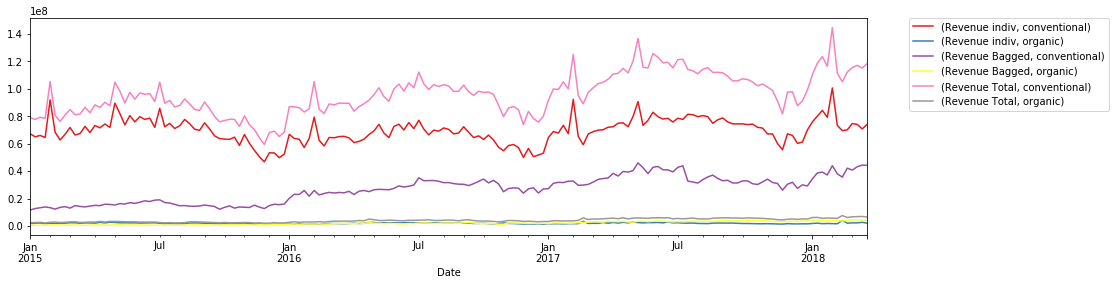

In [54]:
avocado_r_t.plot(cmap='Set1', figsize=(15,4))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.show()

Although the average price of organic avocados is higher, the revenue from organic avocados doesn't account for much of the total revenue.



In [55]:
avocado_rev=avocado.pivot_table(index='Date', aggfunc='sum')[['Revenue indiv', 'Revenue Bagged', 'Revenue Total']]


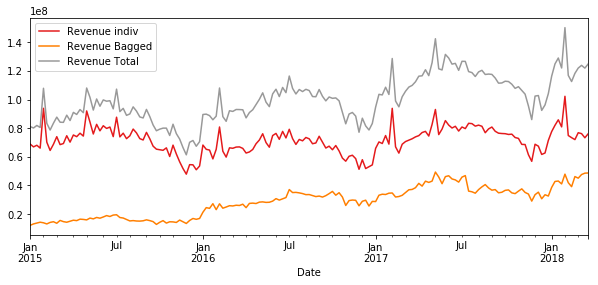

In [56]:
avocado_rev.plot(cmap='Set1', figsize=(10,4))
plt.show()

Now this graph is very interesting. The red line is the revenue from individual avocados, and it looks like the seasonal trend is clearly visible here. This means that the revenue from sales of individual avocados has a seasonal pattern which is dictating the seasonal pattern in our total revenue. Now the orange line, is the revenue from bagged avocados. There is a clear upward trajectory in the past three years here. The seasonal trend is also weaker.

Now let's see if this observation is confirmed from our data:

In [57]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [58]:
revenue=avocado[['Total indiv','Revenue indiv','Total Bags', 'Revenue Bagged', 'Total Volume', 'Revenue Total']]

In [59]:
rename=['Total_indiv','Revenue_indiv','Total_Bags', 'Revenue_Bagged', 'Total_Volume', 'Revenue_Total']

In [60]:
revenue.columns=rename

In [61]:
print(revenue.columns)

Index(['Total_indiv', 'Revenue_indiv', 'Total_Bags', 'Revenue_Bagged',
       'Total_Volume', 'Revenue_Total'],
      dtype='object')


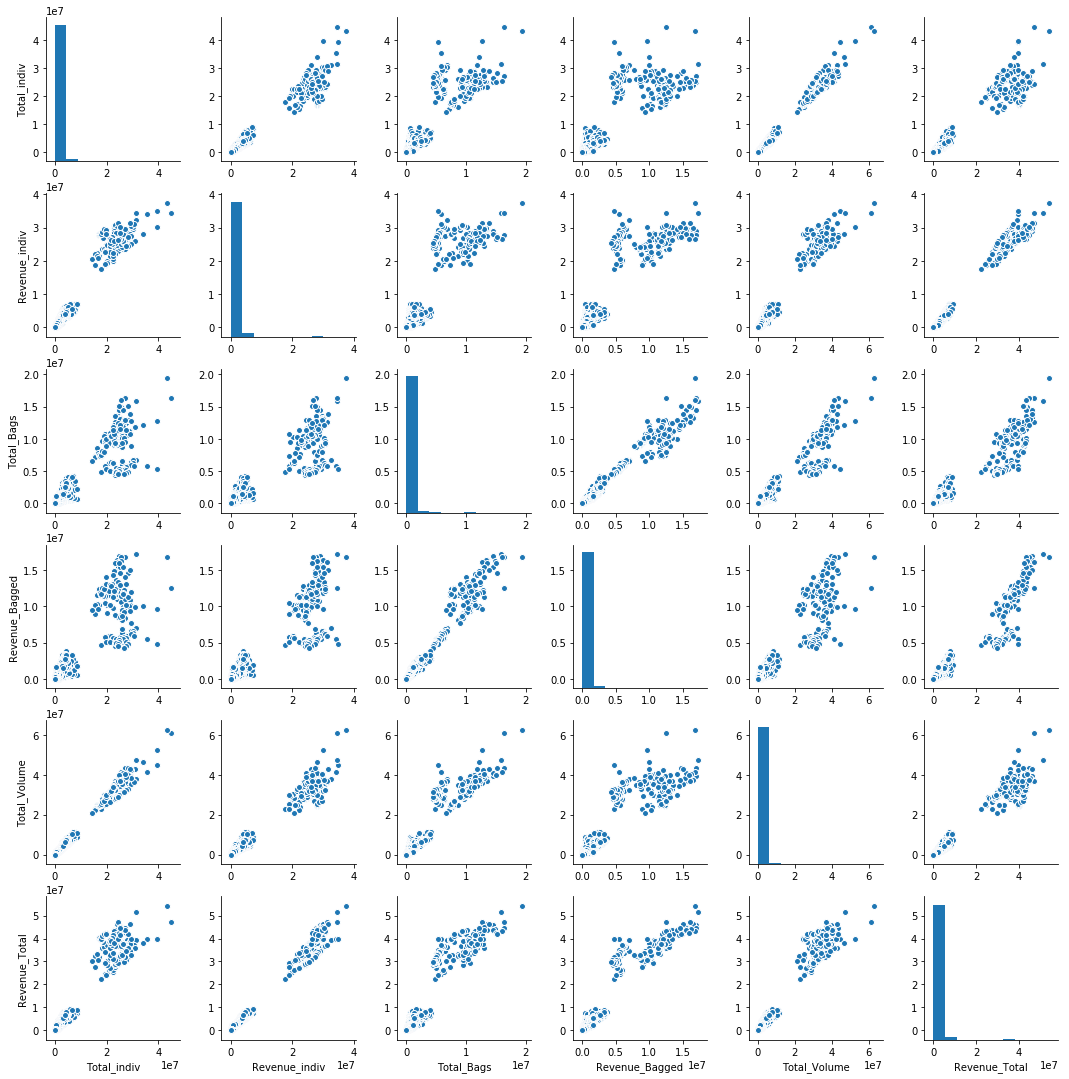

In [62]:
sns.pairplot(revenue)
plt.show()

In [63]:
lm3=smf.ols(formula='Revenue_Total ~ Total_indiv + Total_Bags', data=revenue).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Revenue_Total   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.436e+05
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        13:36:00   Log-Likelihood:            -2.6847e+05
No. Observations:               18249   AIC:                         5.369e+05
Df Residuals:                   18246   BIC:                         5.370e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.919e+04   4520.466      6.458      0.000    2.03e+04    3.81e+04
Total_indiv     0.8766      0.005    185.796      0.000       0.867       0.886
Total_Bags      1.5155      0.012    125.820      0.000       1.492       1.539
==============================================================================
Omnibus:                    15778.602   Durbin-Watson:                   0.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38822947.069
Skew:                           2.756   Prob(JB):                         0.00
Kurtosis:                     228.892   Cond. No.                     2.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
revenue['lm2']=0.8766*revenue['Total_indiv']+1.5155*revenue['Total_Bags']+29190

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


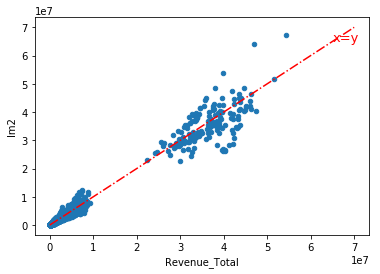

In [65]:
revenue.plot(x='Revenue_Total', y='lm2', kind='scatter')
x=[0,7*10**7]
y=[0,7*10**7]
plt.plot(x,y,'-.',color='red')
plt.text(x=6.5*10**7, y=6.5*10**7, s='x=y', color='red', fontsize=13)
plt.show()

In this simple regression model, we can see that the coefficient for bagged avocados (~1.5) is almost twice as large as the coefficient for individual ones (~0.87).

Forecasting the Average Price

In [66]:
#selecting the test and train data set

test=df5_price.loc[df5_price['year']=='2018']

In [67]:
train=df5_price.loc[df5_price['year']=='2017']^df5_price.loc[df5_price['year']=='2016']^df5_price.loc[df5_price['year']=='2015']

We already know that region has a large effect on the average price.



In [68]:
price_reg=DataFrame(avocado.groupby('region')['AveragePrice'].mean())

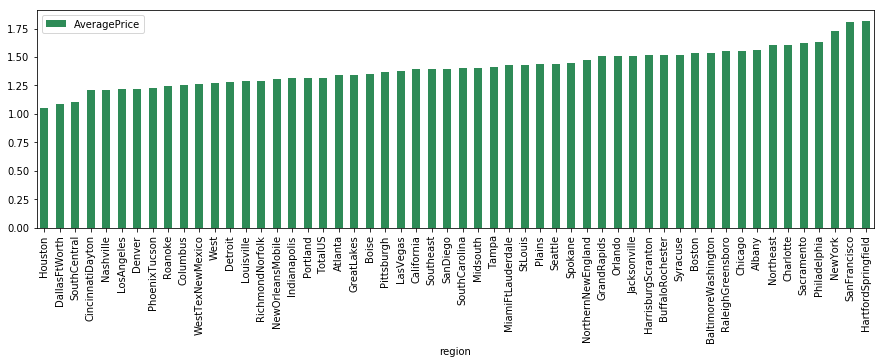

In [69]:
price_reg.sort_values(by='AveragePrice').plot(kind='bar', color='seagreen', figsize=(15,4))
plt.show()

To turn the regions into dummy variables, I will group them into 5 classes based on mean price.



In [70]:
price_reg.reset_index(inplace=True)



In [71]:
Bin=(price_reg['AveragePrice'].max()-price_reg['AveragePrice'].min())/5


In [72]:
class1=[]
class2=[]
class3=[]
class4=[]
class5=[]

for i in price_reg.index:
    if(price_reg['AveragePrice'].loc[i]<price_reg['AveragePrice'].min()+Bin):
        class1.append(price_reg['region'].loc[i])

In [73]:

for i in price_reg.index:
    if(price_reg['AveragePrice'].loc[i]>=price_reg['AveragePrice'].min()+Bin) & (price_reg['AveragePrice'].loc[i]<price_reg['AveragePrice'].min()+2*Bin):
        class2.append(price_reg['region'].loc[i])
        

for i in price_reg.index:
    if(price_reg['AveragePrice'].loc[i]>=price_reg['AveragePrice'].min()+2*Bin) & (price_reg['AveragePrice'].loc[i]<price_reg['AveragePrice'].min()+3*Bin):
        class3.append(price_reg['region'].loc[i])
        

for i in price_reg.index:
    if(price_reg['AveragePrice'].loc[i]>=price_reg['AveragePrice'].min()+3*Bin) & (price_reg['AveragePrice'].loc[i]<price_reg['AveragePrice'].min()+4*Bin):
        class4.append(price_reg['region'].loc[i])
        

for i in price_reg.index:
    if(price_reg['AveragePrice'].loc[i]>=price_reg['AveragePrice'].min()+4*Bin):
        class5.append(price_reg['region'].loc[i])



In [74]:
temp=[]

for i in avocado['region']:
        if i in class1:
            temp.append('class1')
        if i in class2:
            temp.append('class2')
        if i in class3:
            temp.append('class3')
        if i in class4:
            temp.append('class4')
        if i in class5:
            temp.append('class5')
            
        
        

In [75]:
print(len(temp),len(avocado))

18249 18249


In [76]:
avocado['class']=temp

In [77]:
avocado.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,Total indiv,Revenue indiv,Revenue Bagged,Revenue Total,class
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,55539.75,73867.8675,11566.8371,85434.7046,class4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,45371.42,61251.4170,12832.5060,74083.9230,class4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,110074.87,102369.6291,7575.1755,109944.8046,class4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,73180.99,79035.4692,6276.0528,85311.5220,class4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,44855.65,57415.2320,7915.4560,65330.6880,class4


Now instead of individual region, each record belongs to a class now based on the average price.The next thing I want to tackle is the average price itself. I want to capture the seasonality in the prediction I make so I'm going to focus not on the average price, but on the difference between price on a given day and a baseline price. For the baseline price I will pick the weekly average price in year 2015.

In [78]:
week=[]
for i  in avocado['Date']:
        week.append(i.isocalendar()[1])

In [79]:
avocado['week']=week

In [80]:
avocado.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,Total indiv,Revenue indiv,Revenue Bagged,Revenue Total,class,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,55539.75,73867.8675,11566.8371,85434.7046,class4,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,45371.42,61251.4170,12832.5060,74083.9230,class4,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,110074.87,102369.6291,7575.1755,109944.8046,class4,50
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,73180.99,79035.4692,6276.0528,85311.5220,class4,49
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,44855.65,57415.2320,7915.4560,65330.6880,class4,48


In [81]:
year2015=avocado.loc[avocado['year']==2015]

In [82]:
year2015=year2015.pivot_table(index='week',columns='type', aggfunc='mean')['AveragePrice']

since the last and 2nd last isoweek can move to the next year's January, we will forcefully make January as Isoweek 1

In [83]:
for i in avocado.index:
    if(avocado['week'].loc[i]==53) & (avocado['month'].loc[i]=='January'):
        avocado['week'].loc[i]=1
        
for i in avocado.index:
    if(avocado['week'].loc[i]==52) & (avocado['month'].loc[i]=='January'):
        avocado['week'].loc[i]=1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [84]:
avocado.loc[avocado['month']=='January'].head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,Total indiv,Revenue indiv,Revenue Bagged,Revenue Total,class,week
48,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,January,34301.68,36359.7808,11496.5692,47856.3500,class4,4
49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,January,32590.23,38130.5691,13947.6285,52078.1976,class4,3
50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,January,32770.31,40635.1844,10446.7148,51081.8992,class4,2
51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,January,31156.82,38011.3204,11854.0812,49865.4016,class4,1
100,2015-01-25,1.10,449332.85,393408.17,18718.27,594.25,36612.16,13176.39,23435.77,0.0,conventional,2015,Atlanta,January,412720.69,453992.7590,40273.3760,494266.1350,class2,4
101,2015-01-18,1.11,431490.99,372236.92,18701.90,511.69,40040.48,16782.71,23257.77,0.0,conventional,2015,Atlanta,January,391450.51,434510.0661,44444.9328,478954.9989,class2,3
102,2015-01-11,1.11,397542.72,330411.24,18958.22,1135.18,47038.08,21309.61,25728.47,0.0,conventional,2015,Atlanta,January,350504.64,389060.1504,52212.2688,441272.4192,class2,2
103,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,January,388205.70,388205.7000,46815.7900,435021.4900,class2,1
152,2015-01-25,1.20,692934.46,49696.14,386398.73,39488.95,217350.64,209761.81,7588.83,0.0,conventional,2015,BaltimoreWashington,January,475583.82,570700.5840,260820.7680,831521.3520,class4,4
153,2015-01-18,1.23,657741.34,49947.16,393359.60,40576.08,173858.50,169390.88,4467.62,0.0,conventional,2015,BaltimoreWashington,January,483882.84,595175.8932,213845.9550,809021.8482,class4,3


In [85]:
d=[]

for i in avocado.index:
    a=avocado['week'].loc[i]
    if avocado['type'].loc[i]=='conventional':
        d.append(year2015['conventional'].loc[a])
    else:
        d.append(year2015['organic'].loc[a])


In [86]:
avocado['base_price']=d

In [87]:
avocado['delta']=avocado['AveragePrice']-avocado['base_price']

In [88]:
df_modeling=avocado.drop(['Date', 'AveragePrice', 'year','region', 'month', 'base_price', 'Revenue indiv', 'Revenue Bagged', 'Revenue Total','Total indiv', 'Total Bags'], axis=1)



In [89]:
type_num=pd.get_dummies(df_modeling['type'])
class_num=pd.get_dummies(df_modeling['class'])

In [90]:
print(type_num)

       conventional  organic
0                 1        0
1                 1        0
2                 1        0
3                 1        0
4                 1        0
5                 1        0
6                 1        0
7                 1        0
8                 1        0
9                 1        0
10                1        0
11                1        0
12                1        0
13                1        0
14                1        0
15                1        0
16                1        0
17                1        0
18                1        0
19                1        0
20                1        0
21                1        0
22                1        0
23                1        0
24                1        0
25                1        0
26                1        0
27                1        0
28                1        0
29                1        0
...             ...      ...
18219             0        1
18220             0        1
18221         

In [91]:
df_modeling=pd.concat([df_modeling, type_num],axis=1)

In [92]:
df_modeling=pd.concat([df_modeling, class_num],axis=1)

In [94]:
df_modeling.head()


,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,class,week,delta,conventional,organic,class1,class2,class3,class4,class5
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,class4,52,0.315926,1,0,0,0,0,1,0
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,class4,51,0.297778,1,0,0,0,0,1,0
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,class4,50,-0.055370,1,0,0,0,0,1,0
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,class4,49,0.106667,1,0,0,0,0,1,0
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,class4,48,0.234259,1,0,0,0,0,1,0


Now the df is ready for some regression modelling

In [96]:
from sklearn.model_selection import train_test_split

In [111]:
X_multi=df_modeling.drop(['delta', 'type','class'], axis=1)

In [112]:
Y=df_modeling['delta']

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y)

In [114]:
print(X_train, Y_train)

       Total Volume         4046         4225       4770  Small Bags  \
4778      403849.99     82796.77    207314.39   41708.37    66876.30   
12121       1755.38         2.65      1152.33       0.00      360.00   
11164       5199.39        60.95      3578.07       0.00      840.00   
17389       2443.57         0.00       113.63       0.00     1777.21   
17801      21849.91       409.50       280.03      19.17    21137.86   
7012      184465.49     82465.35     40038.54     106.04    48844.82   
815      3234024.32    609506.22   1580854.41  294073.96   615887.17   
15976       3517.63         2.58       948.75       0.00     1066.09   
13601       7896.69       704.84      3572.69       8.71     3509.75   
16722      11388.25       140.56      4659.38     135.63     6441.72   
9270       16507.00     10883.75      4512.52     758.37      352.36   
3954     2793917.73    917098.69    631013.13   59599.98  1086150.77   
5472    29615008.49   9534915.56   9123897.74  490123.01  740876

ValueError: could not convert string to float: 'class3'

In [115]:
X_multi.dtypes, Y.dtypes

(Total Volume    float64
 4046            float64
 4225            float64
 4770            float64
 Small Bags      float64
 Large Bags      float64
 XLarge Bags     float64
 week              int64
 conventional      uint8
 organic           uint8
 class1            uint8
 class2            uint8
 class3            uint8
 class4            uint8
 class5            uint8
 dtype: object, dtype('float64'))

In [116]:
lreg=LinearRegression()
lreg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
coef=DataFrame(lreg.coef_)

In [118]:
features=DataFrame(X_multi.columns)

In [119]:
line1=pd.concat([features, coef], axis=1)
line1.columns=['feature','coefficient']
line1.index=line1['feature']

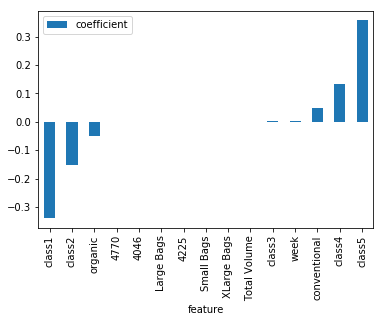

In [122]:
line1.sort_values(by='coefficient').plot(kind='bar')
plt.show()

In [123]:
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

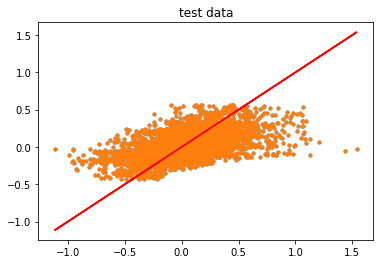

In [125]:
plt.scatter(x=Y_test, y=pred_test, marker='.')
plt.plot(Y_test, Y_test, color='red')
plt.title('test data')
plt.show()

In [126]:
res_train=Y_train - pred_train
res_test=Y_test - pred_test

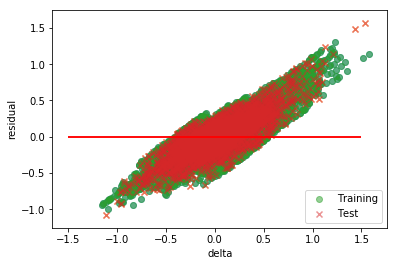

In [128]:
train=plt.scatter(x=Y_train, y=res_train, alpha=0.5)
test=plt.scatter(x=Y_test, y=res_test, marker='x', alpha=0.5)
line=plt.hlines(y=0, xmin=-1.5, xmax=1.5, color='red')
plt.legend((train,test), ('Training', 'Test'), loc='lower right')
plt.ylabel('residual')
plt.xlabel('delta')
plt.show()
